In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [ ]:
fpath = '/YOUR/FOLDER/HERE'

In [ ]:
# Reading data about anime publishment dates
anime_pub_dates = pd.read_csv(fpath + 'animePubDates.csv')

# A title may have a release date (if it's a film) or a start date (if it's a series); we'll take
# either the 1st or the 2nd date, depends on what is present
relDates = []
for i in range(len(anime_pub_dates)):
  relDates.append(anime_pub_dates.animePubDate.iloc[i] if anime_pub_dates.animePubDate.iloc[i] else anime_pub_dates.animeSeriesStartDate.iloc[i])
anime_pub_dates['relDate'] = relDates

# Some titles don't have any release date, we drop such titles
anime_pub_dates = anime_pub_dates.drop(anime_pub_dates[anime_pub_dates.relDate.isna()].index) # drop anime without pub date
anime_pub_dates = anime_pub_dates.drop(columns=['animePubDate', 'animeSeriesStartDate'])

In [ ]:
anime_pub_dates

,anime,animeLabel,relDate
7,http://www.wikidata.org/entity/Q1129655,Cool Devices,1995-01-01T00:00:00Z
9,http://www.wikidata.org/entity/Q1133101,Resort Boin,2007-03-16T00:00:00Z
10,http://www.wikidata.org/entity/Q1140766,Yukikaze,2002-01-01T00:00:00Z
11,http://www.wikidata.org/entity/Q1147094,Кибер-город Эдо,1989-01-01T00:00:00Z
12,http://www.wikidata.org/entity/Q1151768,Munto,2003-01-01T00:00:00Z
...,...,...,...
5249,http://www.wikidata.org/entity/Q108438280,"Wake Up, Girls! Beyond the Bottom",2015-12-11T00:00:00Z
5250,http://www.wikidata.org/entity/Q108666474,One Piece: Heart of Gold,2016-01-01T00:00:00Z
5251,http://www.wikidata.org/entity/Q108668323,Hyokkori Hyōtanjima,1967-07-21T00:00:00Z
5252,http://www.wikidata.org/entity/Q108722713,Незнакомец на берегу моря,2020-09-11T00:00:00Z


In [ ]:
# Reading info about seiyu's birth dates, dropping entriesw that don't have birth dates
actor_birth = pd.read_csv(fpath + 'actorBirth.csv')
actor_birth = actor_birth.drop(actor_birth[actor_birth.bDate.isna()].index)
actor_birth

,seiyu,seiyuLabel,bDate
0,http://www.wikidata.org/entity/Q49573,Aya Hisakawa,1968-11-12T00:00:00Z
1,http://www.wikidata.org/entity/Q50033,Yui Horie,1976-09-20T00:00:00Z
2,http://www.wikidata.org/entity/Q166267,Kazuki Yao,1959-06-17T00:00:00Z
3,http://www.wikidata.org/entity/Q49554,Rie Kugimiya,1979-05-30T00:00:00Z
4,http://www.wikidata.org/entity/Q49566,Ayako Kawasumi,1976-03-30T00:00:00Z
...,...,...,...
2505,http://www.wikidata.org/entity/Q11366773,Hayato Nakata,1978-09-04T00:00:00Z
2506,http://www.wikidata.org/entity/Q11382254,Bin Sasaki,1942-07-31T00:00:00Z
2507,http://www.wikidata.org/entity/Q11531811,Ayu Matsuura,2001-06-03T00:00:00Z
2508,http://www.wikidata.org/entity/Q11662809,Saho Aono,1997-10-19T00:00:00Z


In [ ]:
# Reading info about seiyu's participating in anime
seiyu_anime_link = pd.read_csv(fpath + 'seiyuAnimeLink.csv')
seiyu_anime_link

,item,itemLabel,link,itemType
0,http://www.wikidata.org/entity/Q1347031,"Юки, Аой",http://www.wikidata.org/entity/Q869393,seiyu
1,http://www.wikidata.org/entity/Q333194,"Ямадэра, Коити",http://www.wikidata.org/entity/Q965699,seiyu
2,http://www.wikidata.org/entity/Q1049097,Супермен Локэ,http://www.wikidata.org/entity/Q430395,http://www.wikidata.org/entity/Q430395
3,http://www.wikidata.org/entity/Q1049097,Супермен Локэ,http://www.wikidata.org/entity/Q571148,http://www.wikidata.org/entity/Q571148
4,http://www.wikidata.org/entity/Q1049097,Супермен Локэ,http://www.wikidata.org/entity/Q584678,http://www.wikidata.org/entity/Q584678
...,...,...,...,...
26921,http://www.wikidata.org/entity/Q901835,"Цуда, Минами",http://www.wikidata.org/entity/Q100923583,seiyu
26922,http://www.wikidata.org/entity/Q1192227,"Тобита, Нобуо",http://www.wikidata.org/entity/Q105632476,seiyu
26923,http://www.wikidata.org/entity/Q1331936,"Камия, Хироси",http://www.wikidata.org/entity/Q18578673,seiyu
26924,http://www.wikidata.org/entity/Q17160610,"Такахаси, Риэ",http://www.wikidata.org/entity/Q48964751,seiyu


In [ ]:
# Service flag that controls the script output
verbose = True

In [ ]:
# Let's find the age of the oldest seiyu to understand the max possible acting age
max_actor_age = 0
oldest_bdate = ''
oldest_actor = ''
oldest_actor_link = ''
actors_to_drop = []
today = dt.date.today()

# Trying to calcualte the seiyu's age (https://stackoverflow.com/a/9754466)
# One actor has the birth date in UNIX timestamp; let's not consider him
# as we have 2.5K other actors
for i in range(len(actor_birth)):
  try:
    birth_date = dt.datetime.strptime(actor_birth.iloc[i].bDate[:10], '%Y-%M-%d')
    actor_age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    if actor_age > max_actor_age:
      max_actor_age = actor_age
      oldest_bdate = actor_birth.iloc[i].bDate[:10]
      oldest_actor = actor_birth.iloc[i].seiyuLabel
      oldest_actor_link = actor_birth.iloc[i].seiyu
  except ValueError:
    if verbose:
      print(f"Actor {actor_birth.iloc[i].seiyuLabel} has invalid date of birth: {actor_birth.iloc[i].bDate}")
    actors_to_drop.append(i)

# Printing the oldest actor's age
print(f"The oldest actor is {oldest_actor} ({oldest_actor_link}); their age is {max_actor_age} as they were born in {oldest_bdate}")
actor_birth = actor_birth.drop(actors_to_drop)
print(f"{len(actor_birth)} actors have valid birth dates")

Actor Rie Takahashi has invalid date of birth: t2354526424
The oldest actor is Kaoru Katakai (http://www.wikidata.org/entity/Q11569965); their age is 120 as they were born in 1901-01-01
2509 actors have valid birth dates


In [ ]:
# Dividing the seiyu-anime connection data into data about seiyu and data about anime
seiyu_entries = seiyu_anime_link[seiyu_anime_link.itemType == 'seiyu'].reset_index(drop=True)
anime_entries = seiyu_anime_link[seiyu_anime_link.itemType != 'seiyu'].reset_index(drop=True)

In [ ]:
# Some seiyu that have links to anime don't have info about their birth dates;
# we drop such seiyu
seiyu_w_no_bd = []

for i in range(len(seiyu_entries)):
  if not len(actor_birth[actor_birth.seiyu == seiyu_entries.iloc[i]['item']]):
    if verbose:
      print(f"Seiyu {seiyu_entries.iloc[i].itemLabel} ({seiyu_entries.iloc[i]['item']}) has no date of birth, dropping")
    seiyu_w_no_bd.append(i)

seiyu_entries = seiyu_entries.drop(seiyu_w_no_bd)

Seiyu Austin Tindle (http://www.wikidata.org/entity/Q19881412) has no date of birth, dropping
Seiyu Yuki Otani (http://www.wikidata.org/entity/Q26045217) has no date of birth, dropping
Seiyu しにがみ (http://www.wikidata.org/entity/Q107525057) has no date of birth, dropping
Seiyu Wakana Kowaka (http://www.wikidata.org/entity/Q55753728) has no date of birth, dropping
Seiyu Даинамаито, Ами (http://www.wikidata.org/entity/Q20041058) has no date of birth, dropping
Seiyu Нода, Асуми (http://www.wikidata.org/entity/Q11368838) has no date of birth, dropping
Seiyu Кандзаки, Канари (http://www.wikidata.org/entity/Q11295433) has no date of birth, dropping
Seiyu Андзу, Мицу (http://www.wikidata.org/entity/Q11098449) has no date of birth, dropping
Seiyu Накагами, Икуми (http://www.wikidata.org/entity/Q9013733) has no date of birth, dropping
Seiyu Нагао, Рихоко (http://www.wikidata.org/entity/Q11651881) has no date of birth, dropping
Seiyu Комура, Тэцуо (http://www.wikidata.org/entity/Q11461000) has no

In [ ]:
# Some anime that have links to seiyu don't have info about their release dates;
# we drop such anime
anime_w_no_rd = []

for i in range(len(anime_entries)):
  if not len(anime_pub_dates[anime_pub_dates.anime == anime_entries.iloc[i]['item']]):
    if verbose:
      print(f"Anime {anime_entries.iloc[i].itemLabel} ({anime_entries.iloc[i]['item']}) has no date of release, dropping")
    anime_w_no_rd.append(i)

anime_entries = anime_entries.drop(anime_w_no_rd)

Выходные данные были обрезаны до нескольких последних строк (5000).
Anime Green Green (http://www.wikidata.org/entity/Q16337995) has no date of release, dropping
Anime Green Green (http://www.wikidata.org/entity/Q16337995) has no date of release, dropping
Anime Green Green (http://www.wikidata.org/entity/Q16337995) has no date of release, dropping
Anime Jingai-san no Yome (http://www.wikidata.org/entity/Q105045943) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
Anime Akikan! (http://www.wikidata.org/entity/Q105044806) has no date of release, dropping
An

In [ ]:
# Initializing the dictionary: key is age, value is number of anime voiced by all seiyu in that age
numbers_of_anime_per_years = {}
for i in range(max_actor_age):
  numbers_of_anime_per_years[i] = 0

# Loop for seiyu in which we calcualte the age of participation in each anime
# and increment the corresponding element of dictionary  
for i in range(len(seiyu_entries)):
  if i % 100 == 0 and verbose:
    print(f"Processing {i}/{len(seiyu_entries)} seiyu")
  
  seiyu_entry = seiyu_entries.iloc[i]
  seiyu_bd = dt.datetime.strptime(actor_birth[actor_birth.seiyu == seiyu_entry['item']].iloc[0].bDate[:10], '%Y-%M-%d')
  seiyu_anime_list = anime_entries[anime_entries.link == seiyu_entry['item']] # list of anime for seiyu

  for j in range(len(seiyu_anime_list)):
    anime_entry = seiyu_anime_list.iloc[j]
    try:
      anime_rel_date = dt.datetime.strptime(anime_pub_dates[anime_pub_dates.anime == anime_entry['item']].iloc[0].relDate[:10], '%Y-%M-%d')
      numbers_of_anime_per_years[anime_rel_date.year - seiyu_bd.year - ((anime_rel_date.month, anime_rel_date.day) < (seiyu_bd.month, seiyu_bd.day))] += 1
    # As Wikidata says, some seiyu were born after the release of anime which they acted in; this might be explained by absence of data about anime's
    # remasterings
    except KeyError:
      if verbose:
        print(f"Anime {anime_entry.itemLabel} ({anime_entry['item']}) was released in {anime_rel_date.year}, whereas the seiyu {seiyu_entry.itemLabel} " + \
              f"({seiyu_entry['item']}) was born in {seiyu_bd.year}. Weird...")

Processing 0/12991 seiyu
Anime Sazae-san (http://www.wikidata.org/entity/Q11304591) was released in 1969, whereas the seiyu Мацумото, Ясунори (http://www.wikidata.org/entity/Q1192158) was born in 1970. Weird...
Processing 100/12991 seiyu
Anime 009-1 (http://www.wikidata.org/entity/Q1203945) was released in 1969, whereas the seiyu Акэно Ватанабэ (http://www.wikidata.org/entity/Q1323415) was born in 1982. Weird...
Processing 200/12991 seiyu
Processing 300/12991 seiyu
Processing 400/12991 seiyu
Processing 500/12991 seiyu
Processing 600/12991 seiyu
Processing 700/12991 seiyu
Processing 800/12991 seiyu
Anime 009-1 (http://www.wikidata.org/entity/Q1203945) was released in 1969, whereas the seiyu Иноуэ, Марина (http://www.wikidata.org/entity/Q1329906) was born in 1985. Weird...
Anime Sazae-san (http://www.wikidata.org/entity/Q11304591) was released in 1969, whereas the seiyu Мацумото, Ясунори (http://www.wikidata.org/entity/Q1192158) was born in 1970. Weird...
Processing 900/12991 seiyu
Anime

<BarContainer object of 120 artists>

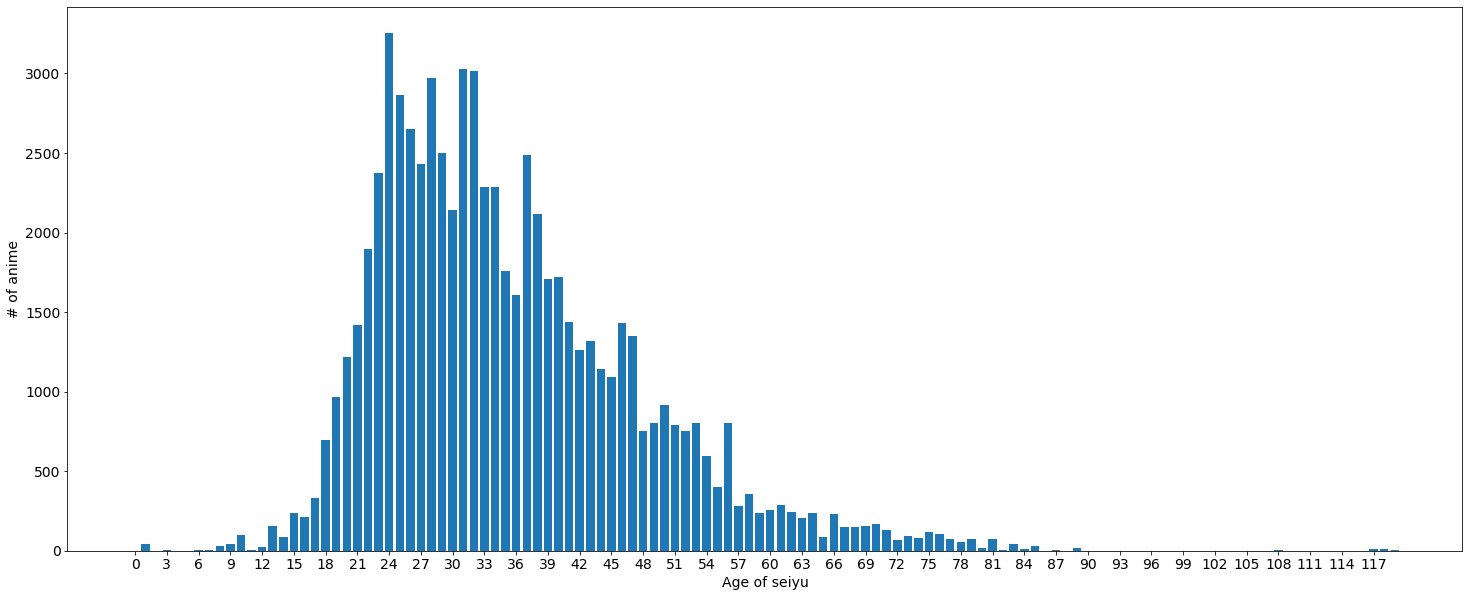

In [ ]:
plt.rcParams.update({'font.size': 14})

# Output histogram (EN)
plt.figure(figsize=(25, 10))
plt.xlabel("Age of seiyu")
plt.ylabel("# of anime")
plt.xticks(range(0, max_actor_age, 3))
plt.bar(numbers_of_anime_per_years.keys(), numbers_of_anime_per_years.values())

<BarContainer object of 120 artists>

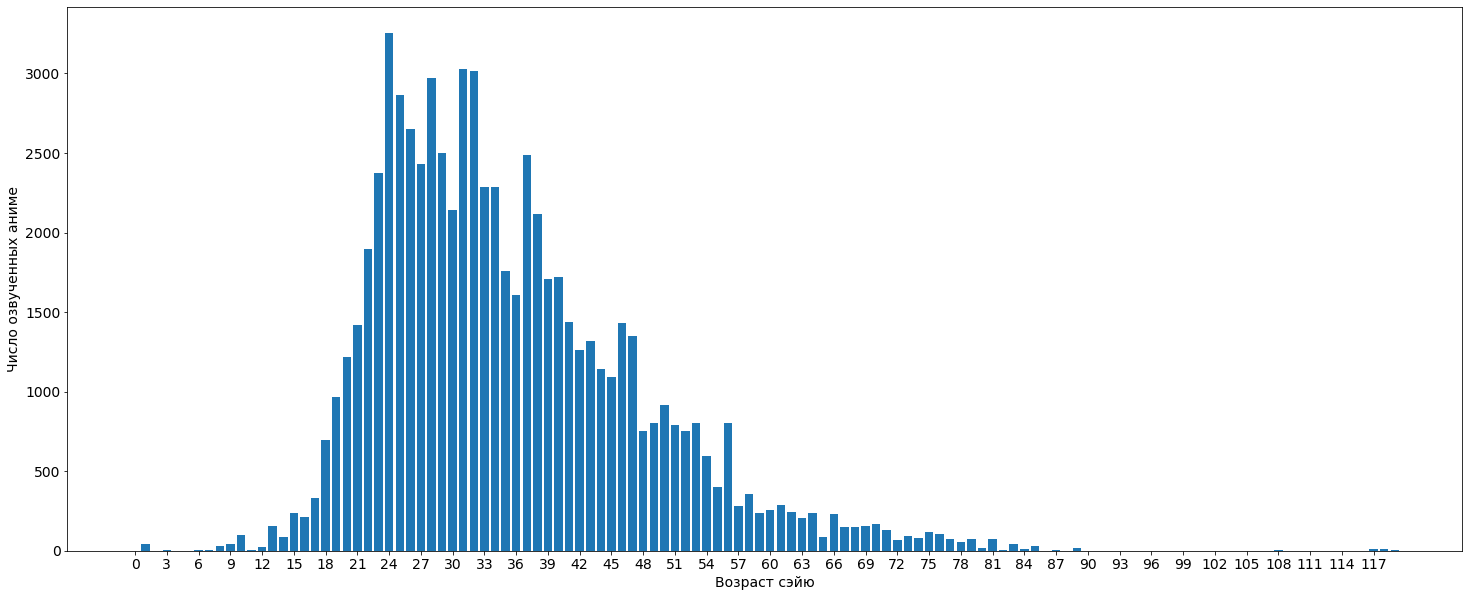

In [ ]:
# Output histogram (RU)
plt.figure(figsize=(25, 10))
plt.xlabel("Возраст сэйю")
plt.ylabel("Число озвученных аниме")
plt.xticks(range(0, max_actor_age, 3))
plt.bar(numbers_of_anime_per_years.keys(), numbers_of_anime_per_years.values())